#**Pandas를 활용한 데이터 분석 실습**
[ 코드출처 및 참고자료: 이것이 데이터 분석이다 with 파이썬 - 윤기태 저, 한빛미디어 ]

##멕시코풍 프랜차이즈 Chipotle의 주문 데이터 분석하기

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
ROOT_PATH = '/gdrive/My Drive/Colab Notebooks/Lectures/'

###Chipotle 데이터셋 읽어오기

In [ ]:
file_path = '{}{}'.format(ROOT_PATH, 'data/chipotle.tsv')
chipo = pd.read_csv(file_path, sep = '\t')

In [ ]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


###Step 1. 탐색: 데이터의 기초 정보 살펴보기
####Chipotle 데이터셋의 기본 정보 확인

In [ ]:
print(chipo.shape)
print("------------------------------------------------------------------------------")
print(chipo.info())
print("------------------------------------------------------------------------------")
print(chipo.columns)
print("------------------------------------------------------------------------------")
print(chipo.index)

(4622, 5)
------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None
------------------------------------------------------------------------------
Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
------------------------------------------------------------------------------
RangeIndex(start=0, stop=4622, step=1)


####Chipotle 데이터셋의 수치적 특징 파악

In [ ]:
chipo['order_id'] = chipo['order_id'].astype(str)     # order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환
print(chipo.head(10))
print("------------------------------------------------------------------------------")
print(chipo.describe())                       # chipo dataframe에서 수치형 피처들의 요약 통계량 확인
print("------------------------------------------------------------------------------")
print(len(chipo['order_id'].unique()))        # order_id의 개수
print("------------------------------------------------------------------------------")
print(len(chipo['item_name'].unique()))       # item_name의 개수

  order_id  ...  item_price
0        1  ...      $2.39 
1        1  ...      $3.39 
2        1  ...      $3.39 
3        1  ...      $2.39 
4        2  ...     $16.98 
5        3  ...     $10.98 
6        3  ...      $1.69 
7        4  ...     $11.75 
8        4  ...      $9.25 
9        5  ...      $9.25 

[10 rows x 5 columns]
------------------------------------------------------------------------------
          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000
------------------------------------------------------------------------------
1834
------------------------------------------------------------------------------
50


###Step 2. 인사이트 발견: 탐색과 시각화
####가장 많이 주문한 아이템

In [ ]:
item_count = chipo['item_name'].value_counts()[:10]
print(item_count)
print("------------------------------------------------------------------------------")
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64
------------------------------------------------------------------------------
Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [ ]:
chipo['item_name'].value_counts().index.tolist()[0]

'Chicken Bowl'

####아이템당 주문 개수와 총량 구하기

In [ ]:
# item당 주문 개수
order_count = chipo.groupby('item_name')['order_id'].count()
print(order_count)
print("------------------------------------------------------------------------------")
order_count[:10]

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [ ]:
# item당 주문 총량
item_quantity = chipo.groupby('item_name')['quantity'].sum()
print(item_quantity)
print("------------------------------------------------------------------------------")
item_quantity[:10]

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

####시각화를 통해 분석 결과 살펴보기

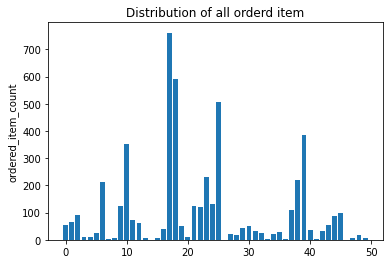

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()
 
plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')
 
plt.show()

###Step 3. 데이터 전처리: 나만의 조력자를 정의하자
####apply와 lambda 함수를 이용한 데이터 전처리

In [ ]:
print(chipo.info())
print("------------------------------------------------------------------------------")
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
------------------------------------------------------------------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [ ]:
# column 단위 데이터에 apply 함수로 전처리 적용
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [ ]:
print(chipo['item_price'])
print("------------------------------------------------------------------------------")
chipo['item_price'].head()

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64
------------------------------------------------------------------------------


0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [ ]:
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


###Step 4. 탐색적 분석: 스무고개로 분석하는 개념적 탐색

#### 데이터를 이해하기 위한 조금 더 복잡한 질문들로 탐색적 데이터 분석 연습하기
- 주문당 평균 계산금액 출력하기
- 한 주문에 10달러 이상 사용한 주문의 id들 출력하기
- 각 아이템의 가격 구하기
- 가장 비싼 주문에서 item이 몇개 팔렸는지 구하기
- “Veggie Salad Bowl”이 몇 번 주문되었는지 구하기
- “Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기

####주문당 평균 계산금액 출력하기

In [ ]:
# 주문당 평균 계산금액 출력
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [ ]:
chipo.groupby('order_id')['item_price'].sum().describe()[:10]

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

####한 주문에 10달러 이상 사용한 주문 번호(id) 출력하기

In [ ]:
# 한 주문에 10달러 이상 사용한 id 출력
chipo_orderid_group = chipo.groupby('order_id').sum()
chipo_orderid_group

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [ ]:
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]
results

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [ ]:
print(results[:10])
print("------------------------------------------------------------------------------")
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
------------------------------------------------------------------------------
['1' '10' '100' ... '997' '998' '999']


####각 아이템의 가격 구하기

In [ ]:
# 각 아이템의 가격 계산
chipo_one_item = chipo[chipo.quantity == 1]
print(chipo_one_item)

     order_id  ...  item_price
0           1  ...        2.39
1           1  ...        3.39
2           1  ...        3.39
3           1  ...        2.39
5           3  ...       10.98
...       ...  ...         ...
4617     1833  ...       11.75
4618     1833  ...       11.75
4619     1834  ...       11.25
4620     1834  ...        8.75
4621     1834  ...        8.75

[4355 rows x 5 columns]


In [ ]:
price_per_item = chipo_one_item.groupby('item_name').min()
print(price_per_item)

                                      order_id  ...  item_price
item_name                                       ...            
6 Pack Soft Drink                         1076  ...        6.49
Barbacoa Bowl                             1000  ...        8.69
Barbacoa Burrito                          1002  ...        8.69
Barbacoa Crispy Tacos                      110  ...        8.99
Barbacoa Salad Bowl                       1283  ...        9.39
Barbacoa Soft Tacos                       1103  ...        8.99
Bottled Water                             1009  ...        1.09
Bowl                                       279  ...        7.40
Burrito                                    214  ...        7.40
Canned Soda                                100  ...        1.09
Canned Soft Drink                         1003  ...        1.25
Carnitas Bowl                             1007  ...        8.99
Carnitas Burrito                          1003  ...        8.69
Carnitas Crispy Tacos                   

In [ ]:
price_per_item.sort_values(by = "item_price", ascending = False)[:10]
price_per_item

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,1076,1,[Coke],6.49
Barbacoa Bowl,1000,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69
Barbacoa Burrito,1002,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",8.69
Barbacoa Crispy Tacos,110,1,"[Fresh Tomato Salsa, Guacamole]",8.99
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99
Bottled Water,1009,1,NaN,1.09
Bowl,279,1,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",7.40
Burrito,214,1,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.40


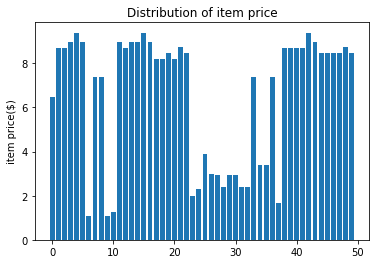

In [ ]:
# 아이템 가격 분포 그래프 출력
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()
 
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
 
plt.show()

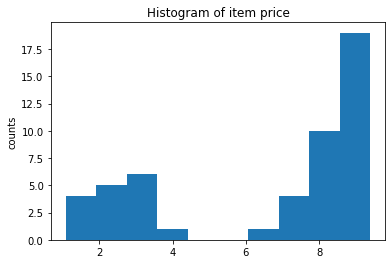

In [ ]:
# 아이템 가격 히스토그램 출력
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')

plt.show()

####가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기

In [ ]:
# 가장 비싼 주문에서 item이 총 몇개 팔렸는지 계산
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


####“Veggie Salad Bowl”이 몇 번 주문되었는지 구하기

In [ ]:
# “Veggie Salad Bowl”이 몇 번 주문되었는지 계산
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]
print(chipo_salad)
print("------------------------------------------------------------------------------")
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id']) # 한 주문 내에서 중복 집계된 item_name을 제거
print(chipo_salad)
print("------------------------------------------------------------------------------")
print(len(chipo_salad))
chipo_salad.head(5)

     order_id  ...  item_price
186        83  ...       11.25
295       128  ...       11.25
455       195  ...       11.25
496       207  ...       11.25
960       394  ...        8.75
1316      536  ...        8.75
1884      760  ...       11.25
2156      869  ...       11.25
2223      896  ...        8.75
2269      913  ...        8.75
2683     1066  ...        8.75
3223     1289  ...       11.25
3293     1321  ...        8.75
4109     1646  ...       11.25
4201     1677  ...       11.25
4261     1700  ...       11.25
4541     1805  ...        8.75
4573     1818  ...        8.75

[18 rows x 5 columns]
------------------------------------------------------------------------------
     order_id  ...  item_price
186        83  ...       11.25
295       128  ...       11.25
455       195  ...       11.25
496       207  ...       11.25
960       394  ...        8.75
1316      536  ...        8.75
1884      760  ...       11.25
2156      869  ...       11.25
2223      896  ...        8.75

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


####“Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기

In [ ]:
# “Chicken Bowl”을 2개 이상 주문한 주문 횟수 계산
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
print(chipo_chicken)
print("------------------------------------------------------------------------------")
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >= 2]
print(chipo_chicken_result)
print("------------------------------------------------------------------------------")
print(chipo_chicken_result.shape[0])

     order_id  ...  item_price
4           2  ...       16.98
5           3  ...       10.98
13          7  ...       11.25
19         10  ...        8.75
26         13  ...        8.49
...       ...  ...         ...
4590     1825  ...       11.25
4591     1825  ...        8.75
4595     1826  ...        8.75
4599     1827  ...        8.75
4604     1828  ...        8.75

[726 rows x 5 columns]
------------------------------------------------------------------------------
     order_id  ...  item_price
4           2  ...       16.98
154        70  ...       17.50
282       124  ...       17.50
409       178  ...       32.94
415       181  ...       17.50
654       271  ...       17.50
976       401  ...       17.50
1017      418  ...       17.50
1106      457  ...       17.50
1429      578  ...       22.50
1514      616  ...       26.25
1588      643  ...       17.50
1832      741  ...       21.96
2075      837  ...       21.96
2106      848  ...       17.50
2339      932  ...       16.9

In [ ]:
# “Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량 계산
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
print(chipo_chicken)
print("------------------------------------------------------------------------------")
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
print(chipo_chicken_ordersum)
print("------------------------------------------------------------------------------")
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]
print(chipo_chicken_result)
print("------------------------------------------------------------------------------")

print(len(chipo_chicken_result))
print("------------------------------------------------------------------------------")
chipo_chicken_result.head(5)

     order_id  ...  item_price
4           2  ...       16.98
5           3  ...       10.98
13          7  ...       11.25
19         10  ...        8.75
26         13  ...        8.49
...       ...  ...         ...
4590     1825  ...       11.25
4591     1825  ...        8.75
4595     1826  ...        8.75
4599     1827  ...        8.75
4604     1828  ...        8.75

[726 rows x 5 columns]
------------------------------------------------------------------------------
order_id
10      1
1000    1
1004    2
1006    1
1008    1
       ..
991     1
992     1
995     1
997     2
998     1
Name: quantity, Length: 615, dtype: int64
------------------------------------------------------------------------------
order_id
1004    2
1023    2
1072    2
1078    2
1091    2
       ..
972     2
973     3
983     2
986     2
997     2
Name: quantity, Length: 114, dtype: int64
------------------------------------------------------------------------------
114
-----------------------------------------

order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64

##전세계 음주 데이터 분석하기
###Step1. 탐색: 데이터의 기초 정보 살펴보기

In [ ]:
file_path = '{}{}'.format(ROOT_PATH, 'data/drinks.csv')
drinks = pd.read_csv(file_path)

In [ ]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [ ]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [ ]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


###Step2. 인사이트의 발견: 탐색과 시각화
####피처간의 상관관계 탐색

In [ ]:
# 연습
# 'beer_servings', 'wine_servings' 두 피처간의 상관계수 계산
# pearson은 상관계수를 구하는 계산 방법 중 하나를 의미하며, 가장 널리 쓰이는 방법
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [ ]:
# 피처간의 상관계수 행렬 계산
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  ...  total_litres_of_pure_alcohol
beer_servings                      1.000000  ...                      0.835839
spirit_servings                    0.458819  ...                      0.654968
wine_servings                      0.527172  ...                      0.667598
total_litres_of_pure_alcohol       0.835839  ...                      1.000000

[4 rows x 4 columns]


In [ ]:
import seaborn as sns

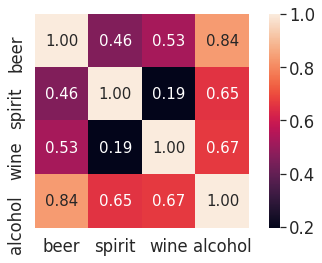

In [ ]:
# corr 행렬 히트맵 시각화
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름 축약
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

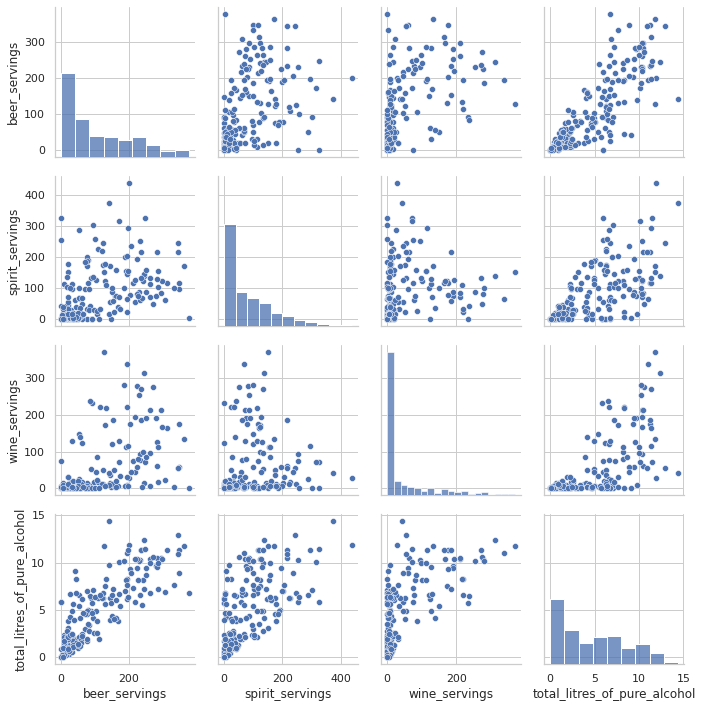

In [ ]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot 출력
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

###Step3. 탐색적 분석: 스무고개로 분석하는 개념적 탐색
####결측 데이터 전처리
- continent column에 대한 결측 데이터 처리 과정

In [ ]:
print(drinks.isnull().sum())
print("------------------------------------")
print(drinks.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
------------------------------------
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [ ]:
# 결측데이터 처리 : 기타 대륙으로 통합 -> 'OT'
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


####파이차트 시각화

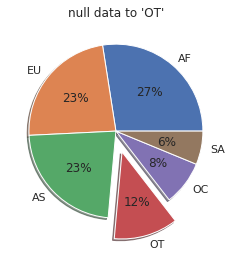

In [ ]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

####그룹 단위의 데이터 분석 : 대륙별 분석
- apply, agg 함수를 이용한 대륙별 분석

In [ ]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계 계산
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [ ]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙 검출
total_mean = drinks.total_litres_of_pure_alcohol.mean()
print(total_mean)
print('-----------------------------------------------------------------------------------')
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
print(continent_mean)
print('-----------------------------------------------------------------------------------')
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

4.717098445595855
-----------------------------------------------------------------------------------
continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64
-----------------------------------------------------------------------------------
continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [ ]:
# 평균 beer_servings이 가장 높은 대륙 검출
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


####분석 결과에 대한 시각화

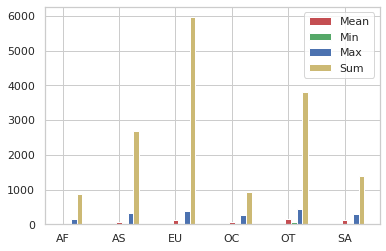

In [ ]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계 시각화
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

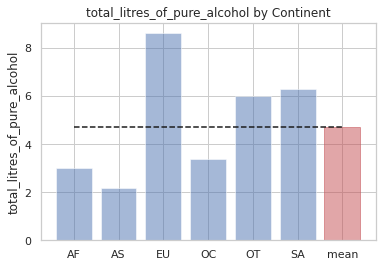

In [ ]:
# 대륙별 total_litres_of_pure_alcohol 시각화
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

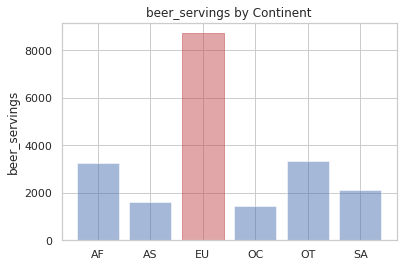

In [ ]:
# 대륙별 beer_servings 시각화
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()
 
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
 
plt.show()

###Step4. 통계적 분석: 분석 대상간의 통계적 차이 검정하기
####아프리카와 유럽간의 맥주 소비량 차이 검정하기

In [ ]:
# 아프리카와 유럽간의 맥주 소비량 차이 검정
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


####대한민국은 얼마나 술을 독하게 마시는 나라일까?

In [ ]:
# total_servings 피처 생성
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알콜 비율 피처 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 순위 정보 생성
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


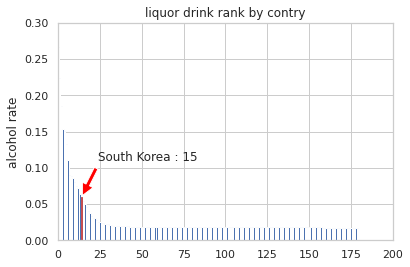

In [ ]:
# 국가별 순위 정보를 그래프로 시각화
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
 
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()